## Study Kasus 2 Mamdani


In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [15]:
permintaan = ctrl.Antecedent(np.arange(0, 6000, 1), "permintaan")
persediaan = ctrl.Antecedent(np.arange(0, 700, 1), "persediaan")
produksi = ctrl.Consequent(np.arange(0, 8000, 1), "produksi")

In [ ]:
permintaan["turun"] = fuzz.trapmf(permintaan.universe, [0, 0, 1000, 5000])
permintaan["naik"] = fuzz.trapmf(permintaan.universe, [1000, 5000, 6000, 6000])

persediaan["sedikit"] = fuzz.trapmf(persediaan.universe, [0, 0, 100, 600])
persediaan["banyak"] = fuzz.trapmf(persediaan.universe, [100, 600, 700, 700])

produksi["berkurang"] = fuzz.trapmf(produksi.universe, [0, 0, 2000, 7000])
produksi["bertambah"] = fuzz.trapmf(produksi.universe, [2000, 7000, 8000, 8000])

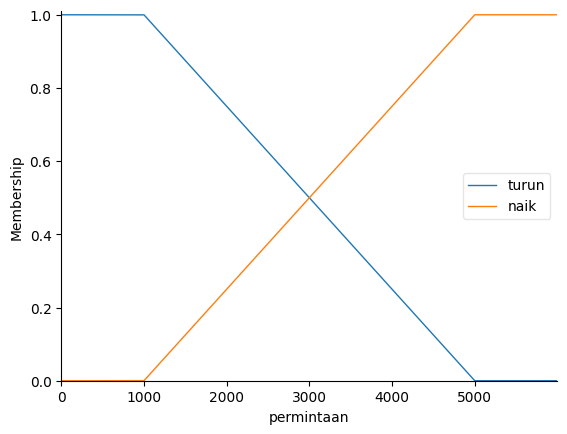

In [21]:
permintaan.view()

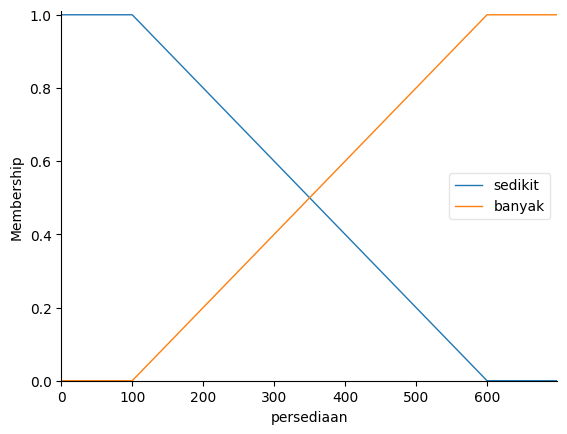

In [22]:
persediaan.view()

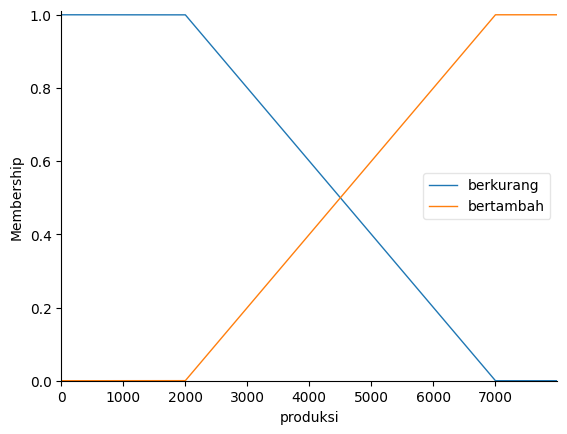

In [23]:
produksi.view()

In [7]:
rule1 = ctrl.Rule(permintaan["turun"] & persediaan["banyak"], produksi["berkurang"])
rule2 = ctrl.Rule(permintaan["turun"] & persediaan["sedikit"], produksi["berkurang"])
rule3 = ctrl.Rule(permintaan["naik"] & persediaan["banyak"], produksi["bertambah"])
rule4 = ctrl.Rule(permintaan["naik"] & persediaan["sedikit"], produksi["bertambah"])

In [8]:
produksi_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
produksi_simulasi = ctrl.ControlSystemSimulation(produksi_ctrl)

In [9]:
produksi_simulasi.input["permintaan"] = 4000
produksi_simulasi.input["persediaan"] = 300

4819.574290127987


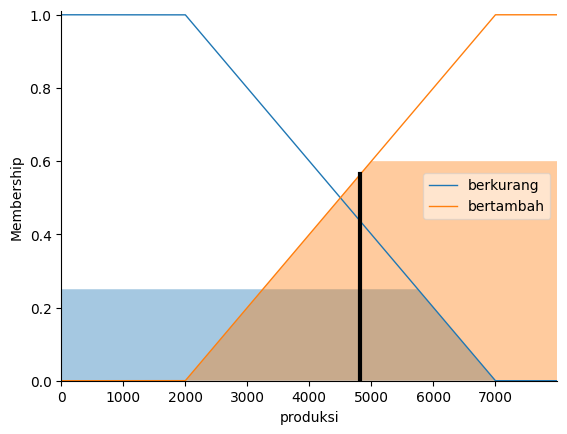

In [10]:
produksi_simulasi.compute()
print(produksi_simulasi.output["produksi"])
produksi.view(sim=produksi_simulasi)

In [11]:
hasil_produksi = produksi_simulasi.output["produksi"]
print(f"Produksi yang disarankan: {hasil_produksi:.2f} kemasan per hari")


Produksi yang disarankan: 4819.57 kemasan per hari
